In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

In [117]:
# Read CSV
airline_df = pd.read_csv('Airline_Delay_Cause.csv')

# Preview DataFrame
airline_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [118]:
# Preview Info
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318017 non-null  object 
 3   carrier_name         318017 non-null  object 
 4   airport              318017 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317529 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317529 non-null  float64
 9   weather_ct           317529 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317529 non-null  float64
 15  arr_delay        

In [119]:
# Preview Incomplete
airline_df.count()

year                   318017
month                  318017
carrier                318017
carrier_name           318017
airport                318017
airport_name           318017
arr_flights            317529
arr_del15              317289
carrier_ct             317529
weather_ct             317529
nas_ct                 317529
security_ct            317529
late_aircraft_ct       317529
arr_cancelled          317529
arr_diverted           317529
arr_delay              317529
carrier_delay          317529
weather_delay          317529
nas_delay              317529
security_delay         317529
late_aircraft_delay    317529
dtype: int64

In [120]:
# Drop Incomplete
clean_airline_df = airline_df.dropna()
clean_airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317289 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317289 non-null  int64  
 1   month                317289 non-null  int64  
 2   carrier              317289 non-null  object 
 3   carrier_name         317289 non-null  object 
 4   airport              317289 non-null  object 
 5   airport_name         317289 non-null  object 
 6   arr_flights          317289 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317289 non-null  float64
 9   weather_ct           317289 non-null  float64
 10  nas_ct               317289 non-null  float64
 11  security_ct          317289 non-null  float64
 12  late_aircraft_ct     317289 non-null  float64
 13  arr_cancelled        317289 non-null  float64
 14  arr_diverted         317289 non-null  float64
 15  arr_delay        

In [121]:
# Verify Dropped Rows
clean_airline_df.count()
clean_airline_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [122]:
# Renaming Columns
# 

airline_df.rename(columns={
    "year": "Year",
    "month": "Month",
    "carrier": "IATA-C",
    "carrier_name": "Carrier",
    "airport": "IATA-A",
    "airport_name": "Airport",
    "arr_flights": "Flights",
    "arr_del15": "Delays",
    "carrier_ct": "Carrier Ct",
    "weather_ct": "Weather Ct",
    "nas_ct": "Nas Ct",
    "security_ct": "Security Ct",
    "late_aircraft_ct": "Late Aircraft Ct",
    "arr_cancelled": "Arrival Cancelled",
    "arr_diverted": "Arrival Diverted",
    "arr_delay": "Arrival Delay",
    "carrier_delay": "Carrier Delay",
    "weather_delay": "Weather Delay",
    "nas_delay": "Nas Delay",
    "security_delay": "Security Delay",
    "late_aircraft_delay": "Late Aircraft Delay"
}, inplace=True)

airline_df.columns

Index(['Year', 'Month', 'IATA-C', 'Carrier', 'IATA-A', 'Airport', 'Flights',
       'Delays', 'Carrier Ct', 'Weather Ct', 'Nas Ct', 'Security Ct',
       'Late Aircraft Ct', 'Arrival Cancelled', 'Arrival Diverted',
       'Arrival Delay', 'Carrier Delay', 'Weather Delay', 'Nas Delay',
       'Security Delay', 'Late Aircraft Delay'],
      dtype='object')

C:\Users\linnv\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


TypeError: 'value' must be an instance of str or bytes, not a tuple

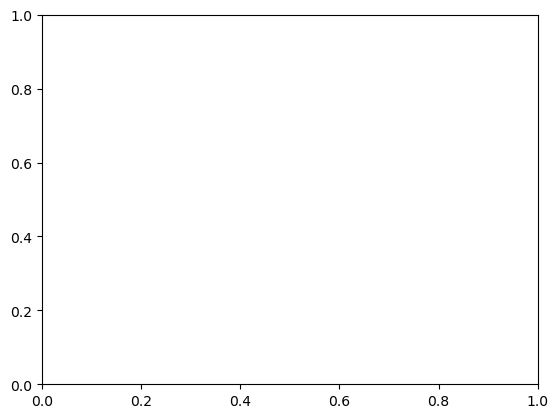

In [123]:
#x_axis = ['value_1', 'value_2', 'value_3', ...]
#y_axis = ['value_1', 'value_2', 'value_3', ...]

#plt.plot(x_axis, y_axis)
#plt.title('title name')
#plt.xlabel('x_axis name')
#plt.ylabel('y_axis name')
#plt.show()

# Create bar chart

year = [2020, 2022]

Years = ["Years", (2020, 2022)]
Cancellations = ["Arrival Cancelled"]

plt.plot(Years, Cancellations)
plt.title('Cancellations')
plt.xlabel('Year')
plt.ylabel('Cancellations')
plt.show()

In [114]:
cancellations_df = airline_df.groupby(["Year", "Carrier"]).max()[["Arrival Cancelled","Arrival Delay"]]
cancellations_df.head(10)

Arrival Cancelled  Arrival Delay
Year Carrier                                                       
2003 ATA Airlines d/b/a ATA                     46.0        39486.0
     AirTran Airways Corporation                81.0        82204.0
     Alaska Airlines Inc.                       90.0        41462.0
     America West Airlines Inc.                 70.0        38355.0
     American Airlines Inc.                    321.0       189546.0
     American Eagle Airlines Inc.              511.0       143476.0
     Atlantic Coast Airlines                   293.0       123729.0
     Atlantic Southeast Airlines               250.0       126716.0
     Continental Air Lines Inc.                159.0       119787.0
     Delta Air Lines Inc.                      296.0       218313.0